<a href="https://colab.research.google.com/github/nirmalaJ21/-CircleChallenge/blob/main/Copy_of_Copy_of_recommender_system_movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Source
This data is from Grouplens website: https://grouplens.org/datasets/movielens/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_ratings = pd.read_csv('/content/ratings.csv')

df_ratings.sample(20)

,userId,movieId,rating,timestamp
15608,103,596,4.5,1431957572
51674,334,589,4.0,1234629873
82830,525,5159,3.5,1476480402
2519,19,1367,1.0,965706615
31434,217,3168,3.0,955942076
80706,509,66097,4.0,1435999279
49462,318,53574,4.0,1422108976
58022,380,122918,5.0,1496617026
67597,438,112,3.5,1105649510
304,4,52,3.0,964622786


In [ ]:
df_movies = pd.read_csv('/content/movies.csv')

df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
df = pd.merge(df_movies, df_ratings, on='movieId')
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [ ]:
df.describe()

,movieId,userId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,19435.295718,326.127564,3.501557,1.205946e+09
std,35530.987199,182.618491,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,325.000000,3.500000,1.186087e+09
75%,8122.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,610.000000,5.000000,1.537799e+09


In [ ]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [ ]:
ratings['number_of_ratings'] = df.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


<Axes: >

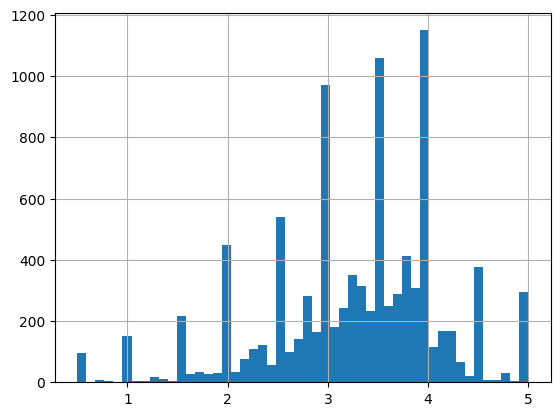

In [ ]:

ratings['rating'].hist(bins=50)

In [ ]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


#Item based recommender

In [ ]:
movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.tail(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN
609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
AFO_user_rating = movie_matrix['Air Force One (1997)']
AFO_user_rating.dropna().head()

userId
11    4.0
18    3.0
28    2.0
42    4.0
45    4.0
Name: Air Force One (1997), dtype: float64

In [ ]:
similar_to_air_force_one = movie_matrix.corrwith(AFO_user_rating)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [ ]:
similar_to_air_force_one.dropna().head()

title
'burbs, The (1989)                0.168459
(500) Days of Summer (2009)       0.086874
*batteries not included (1987)   -0.866025
10 Cloverfield Lane (2016)        0.192450
10 Items or Less (2006)          -1.000000
dtype: float64

In [ ]:
corr_AFO = pd.DataFrame(similar_to_air_force_one, columns=['correlation'])
corr_AFO.dropna(inplace=True)
corr_AFO.head()

,correlation
title,
"'burbs, The (1989)",0.168459
(500) Days of Summer (2009),0.086874
*batteries not included (1987),-0.866025
10 Cloverfield Lane (2016),0.192450
10 Items or Less (2006),-1.000000


In [ ]:
corr_AFO = corr_AFO.join(ratings['number_of_ratings'])
print(corr_AFO .head())

                                correlation  number_of_ratings
title                                                         
'burbs, The (1989)                 0.168459                 17
(500) Days of Summer (2009)        0.086874                 42
*batteries not included (1987)    -0.866025                  7
10 Cloverfield Lane (2016)         0.192450                 14
10 Items or Less (2006)           -1.000000                  3


In [ ]:
corr_AFO[corr_AFO['number_of_ratings'] > 100].sort_values(by='correlation', ascending=False).head(10)

,correlation,number_of_ratings
title,,
Clear and Present Danger (1994),0.698836,110
"Net, The (1995)",0.598322,112
"Green Mile, The (1999)",0.574799,111
"Firm, The (1993)",0.561304,101
"Departed, The (2006)",0.543279,107
Apollo 13 (1995),0.536136,201
Twister (1996),0.511892,123
American Pie (1999),0.501064,103
"Truman Show, The (1998)",0.500529,125


In [ ]:
TS_user_rating = movie_matrix['Toy Story (1995)']
TS_user_rating.dropna().head()

userId
1     4.0
5     4.0
7     4.5
15    2.5
17    4.5
Name: Toy Story (1995), dtype: float64

In [ ]:
similar_to_toy_story = movie_matrix.corrwith(TS_user_rating)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [ ]:
similar_to_toy_story.dropna().head()

title
'burbs, The (1989)                0.240563
(500) Days of Summer (2009)       0.353833
*batteries not included (1987)   -0.427425
10 Cent Pistol (2015)             1.000000
10 Cloverfield Lane (2016)       -0.285732
dtype: float64

In [ ]:
corr_TS = pd.DataFrame(similar_to_toy_story, columns=['correlation'])
corr_TS.dropna(inplace=True)
corr_TS.head()

,correlation
title,
"'burbs, The (1989)",0.240563
(500) Days of Summer (2009),0.353833
*batteries not included (1987),-0.427425
10 Cent Pistol (2015),1.000000
10 Cloverfield Lane (2016),-0.285732


In [ ]:
corr_TS = corr_TS.join(ratings['number_of_ratings'])
print(corr_TS .head())

                                correlation  number_of_ratings
title                                                         
'burbs, The (1989)                 0.240563                 17
(500) Days of Summer (2009)        0.353833                 42
*batteries not included (1987)    -0.427425                  7
10 Cent Pistol (2015)              1.000000                  2
10 Cloverfield Lane (2016)        -0.285732                 14


In [ ]:
corr_TS[corr_TS['number_of_ratings'] > 100].sort_values(by='correlation', ascending=False).head(10)

,correlation,number_of_ratings
title,,
Toy Story (1995),1.000000,215
"Incredibles, The (2004)",0.643301,125
Finding Nemo (2003),0.618701,141
Aladdin (1992),0.611892,183
"Monsters, Inc. (2001)",0.490231,132
Mrs. Doubtfire (1993),0.446261,144
"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",0.438237,120
American Pie (1999),0.420117,103
Die Hard: With a Vengeance (1995),0.410939,144
